#### Computational Physics - Fall 2020
#### Shalma Wegsman

## Homework #9

### Problem 1 - Particle in a Box

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [98]:
def SqWell(z):
    V0 = 10e-3/6.242e18 #J
    a = 1e-10 #m
    hbar = 1.054571817e-34 #m2 kg / s
    #c = 3e8
    m = 1.6726219e-27 #kg, proton mass
    z0 = (a/hbar) * np.sqrt(2*m*V0)
    return(np.tan(z)-np.sqrt((z0/z)**2-1))

Note that in order for this function to evaluate to a real number, we need $(z_0 /z)^2 > 1 \Rightarrow z_0>z$

2.195208846796837


C:\Users\shalm\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


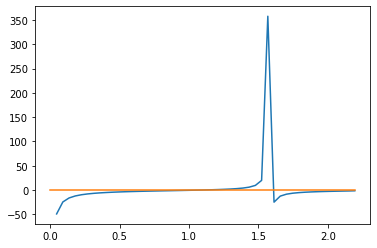

In [92]:
#V0 = 10e-3 #eV
#a = 1e-10 #m
#hbar = 4.135667696e-15 #eV s
#c = 3e8
#m = 938.27e6 #eV/c^2, proton mass

V0 = 10e-3/6.242e18 #J
a = 1e-10 #m
hbar =1.054571817e-34 #m2 kg / s
#c = 3e8
m = 1.6726219e-27 #kg, proton mass

z0 = (a/hbar) * np.sqrt(2*m*V0)
print(z0)
x = np.linspace(0, z0)
y = SqWell(x)
plt.plot(x,y)
yy = [0]*len(x)
plt.plot(x,yy)

In [117]:
#To find roots:
def RootFinder(f,xmin,xmax):
    roots = []
    x = np.linspace(xmin,xmax,100)
    for i in range(len(x)-1):
        a = x[i]
        b = x[i+1]
        f_a = f(a)
        f_b = f(b)
        if f_a*f_b<0:
            root = scipy.optimize.root_scalar(SqWell,method='bisect', bracket=(a,b))
            roots.append(root)
    return(roots)

In [118]:
RootFinder(SqWell,0,z0)

C:\Users\shalm\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


[      converged: True
            flag: 'converged'
  function_calls: 36
      iterations: 34
            root: 1.0645164294711158,       converged: True
            flag: 'converged'
  function_calls: 36
      iterations: 34
            root: 1.5707963267946201]

So our two roots are $z_1=1.0645$ and $z_2=1.5708$. These correspond to energies given by:

$$ E = \frac{1}{2 m} \bigg( \frac{\hbar z}{a} \bigg)^2 - V_0 $$


In [121]:
def E(z):
    V0 = 10e-3/6.242e18 #J
    a = 1e-10 #m
    hbar =1.054571817e-34 #m2 kg / s
    m = 1.6726219e-27 #kg, proton mass
    return((hbar*z/a)**2 /(2*m) - V0)

z1 = 1.0645
z2 = 1.5708

print('E1 = ',E(z1)*6.242e18,' eV') #converting to eV
print('E2 = ',E(z2)*6.242e18,' eV')

E1 =  -0.007648528913671197  eV
E2 =  -0.00487976260992016  eV


### Problem 2 - Lagrange Point

Exercise 6.16

(A)

At the Lagrange point, the sum of the forces on the satellite from the Earth and moon (F_Es and F_Ms) should equal F = ma for the satellite.

$$ F_E + F_M = m_{s} a_s $$
$$ \frac{G M m_s}{r^2} - \frac{G m m_s}{(R-r)^2} = m_s \frac{v_s^2}{r}$$

Dividing by the mass of the satellite and setting $v_s = \omega r$, we get:

$$ \boxed{\frac{GM}{r^2} - \frac{G m}{(R-r)^2} = \omega^2 r}$$

(B)

In [67]:
def f(r):
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    R = 3.844e8
    omega = 2.662e-6
    return((G*M/r**2)-(G*m/(R-r)**2)-omega**2*r)

def fp(r):
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    R = 3.844e8
    omega = 2.662e-6
    ff = -2*G*M*r**(-3) - 2*G*m*(R-r)**(-3) - omega**2
    return(ff)

def fpp(r):
    G = 6.674e-11
    M = 5.974e24
    m = 7.348e22
    R = 3.844e8
    omega = 2.662e-6
    ff = 6*G*M/r**4 - 6*G*m/(R-r)**4
    return(ff)

Text(0.5, 0, 'x')

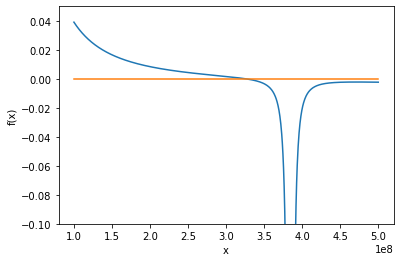

In [68]:
#Let's plot f(x) so we can choose a good guess

R = 3.844e8
x = np.linspace(1e8,5e8,1000)
y = f(x)
yy = [0]*1000
plt.plot(x,y)
plt.plot(x,yy)
#plt.yscale('log')
plt.ylim(-0.1,0.05)
plt.ylabel('f(x)')
plt.xlabel('x')

In [75]:
def Newton(f,r0, tol):
    eps = f(r0)
    r = r0
    while eps > tol:
        f_r = f(r)
        fp_r = fp(r)
        newr = r - (f_r/fp_r)
        #eps = np.abs((eps**2 *fpp(newr))/(2*f(newr))) #this error formula matches the one from the class notes
        eps = np.abs(f_r/fp_r) #this one is just the difference between r and newr
        r = newr
    return(r)

In [76]:
print('L1 = ',Newton(f,3e8,1e-6),' m')

L1 =  326045071.66535544  m


This is pretty close to the real value, 326400 km.

### Problem 3 - Temperature of a Blackbody

Exercise 6.18

(A)

In [133]:
#using my trapezoid integral codes from HW4:
def trap_integral(f,a,b,N):
    x = np.linspace(a,b,N)
    h = (b-a)/np.float64(N)
    trap_int =[]
    trap = f(a)*h/2 + f(b)*h/2
    trap_int.append(trap)
    for i in x:
        new = f(i)*h
        trap+=new
        trap_int.append(trap)
    return(trap, trap_int)

def trap_int_tol(f,a,b,tol):
    trap1 = trap_integral(f,a,b,1)[0]
    trap2 = trap_integral(f,a,b,2)[0]
    n = 2
    h=(b-a)/np.float64(n)
    err_slice = (trap2-trap1)/3
    while np.abs(err_slice) > tol:
        n*=2
        h=(b-a)/np.float64(n)
        trap1 = trap_integral(f,a,b,n-1)[0]
        trap2 = trap_integral(f,a,b,n)[0]
        err_slice = (trap2-trap1)/3
        #print("N= ",n,", Integral= ",trap2,", Error= ",err_slice)
    return(trap2)

In [134]:
def Fnc_to_int(x):
    func = x**3/(np.exp(x)-1)
    return(func)

In [137]:
def Eta(T):
    kB = 1.38064852e-23
    c = 3e8
    h = 6.62607004e-34
    lam1 = 390e-9
    lam2 = 750e-9
    upper = h*c/(lam2*kB*T)
    lower = h*c/(lam1*kB*T)
    Int = trap_int_tol(Fnc_to_int,upper,lower,1e-6)
    return(15*Int / np.pi**4)

Text(0, 0.5, '$Eta (T)$')

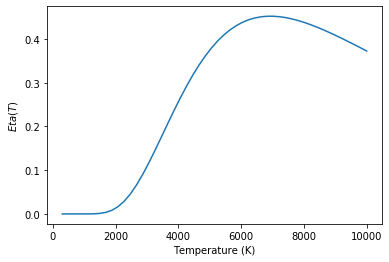

In [141]:
T_list = np.linspace(300,10000)
Eta_list = [Eta(t) for t in T_list]

plt.plot(T_list,Eta_list)
plt.xlabel('Temperature (K)')
plt.ylabel('$Eta (T)$')

(B)

In [143]:
def Golden(f,a,c,tol=1e-5):
    w=(3.-np.sqrt(5.))/2
    b = (c-a)*w + a
    f_c = f(c)
    f_b = f(b)
    f_a = f(a)
    n = 0
    while(c-b > tol and b-a > tol):
        x = b + w*(c-b)
        f_x = f(x)
        if f_x<f_b:
            a = b
            b = x
            f_a = f_b
            f_b = f_x
        else:
            c = x
            f_c = f_x
        n+=1
        x = b + w*(b-a)
        f_x = f(x)
        if f_x < f_b:
            c = b
            f_c = f_b
            b = x
            f_b = f_x
        else:
            a = x
            f_a = f_x
        n+=1
    return(b,n)

def find_max(f,xstart,delta,num,tol,rev):
    a=xstart
    b=a+delta
    c=b+delta
    f_a=f(a)
    f_b=f(b)
    f_c=f(c)
    x=np.zeros(num)
    n=np.zeros(num,dtype='int')
    for i in np.arange(num):
        go=1
        while go:
            if((f_a>f_b)+(f_c>f_b)):
                a=b
                f_a=f_b
                b=c
                f_b=f_c
                c=b+delta
                f_c=f(c)
            else:
                go=0
                x[i],n[i]=Golden(f,a,c,tol)
                a=c
                f_a=f_c
                b=a+delta
                c=b+delta
                f_b=f(b)
                f_c=f(c)
    return(x,n)

In [156]:
def negEta(T):
    kB = 1.38064852e-23
    c = 299792458
    h = 6.62607004e-34
    lam1 = 390e-9
    lam2 = 750e-9
    upper = h*c/(lam2*kB*T)
    lower = h*c/(lam1*kB*T)
    Int = trap_int_tol(Fnc_to_int,upper,lower,1e-6)
    return(-15*Int / np.pi**4)

Tpeak,num=find_max(Eta,5000,1,1,1,negEta)

In [157]:
print(Tpeak)

[6931.76393202]


(C)

This isn't practical, since tungsten would melt at that temperature (it has melting point 3,695 K).